# 20 - Bifacial effects on Sustainability Metrics

Close look at improvements in energy and carbon due to variying bifaciality 70 to 95%


## 1. Setup and Create PV ICE Simulation Object

In [1]:
import PV_ICE
import os,sys
from pathlib import Path
import matplotlib.pyplot as plt
import pandas as pd
PV_ICE.__version__

'v0.2.0+558.gd242de7.dirty'

In [2]:
# This information helps with debugging and getting support :)
import sys, platform
print("Working on a ", platform.system(), platform.release())
print("Python version ", sys.version)
print("Pandas version ", pd.__version__)
print("PV_ICE version ", PV_ICE.__version__)

Working on a  Windows 10
Python version  3.11.4 | packaged by Anaconda, Inc. | (main, Jul  5 2023, 13:38:37) [MSC v.1916 64 bit (AMD64)]
Pandas version  2.1.0
PV_ICE version  v0.2.0+558.gd242de7.dirty


In [3]:
testfolder = str(Path().resolve().parent.parent / 'PV_ICE' / 'TEMP' / 'BifacialityStudy')
inputfolder = str(Path().resolve().parent.parent / 'PV_ICE' / 'TEMP')
baselinesfolder = str(Path().resolve().parent.parent /'PV_ICE' / 'baselines')

if not os.path.exists(testfolder):
    os.makedirs(testfolder)

In [4]:
r1 = PV_ICE.Simulation(name='Sim', path=testfolder, baselinepath=baselinesfolder); # Is it possible to define more than one simulation here?

path = C:\Users\sayala\Documents\GitHub\PV_ICE\PV_ICE\TEMP\BifacialityStudy


## 3. Create standard and modified scenarios


In [5]:
r1.createScenario(name='standard', 
                  massmodulefile=r'baseline_modules_mass_World.csv', 
                  energymodulefile = 'baseline_modules_energy.csv' )

r1.scenario['standard'].addMaterial(materialname='glass', 
                                    massmatfile=os.path.join(baselinesfolder, 'baseline_material_mass_glass.csv'),
                                    energymatfile=os.path.join(baselinesfolder, 'baseline_material_energy_glass.csv'))

r1.scenario['standard'].addMaterial(materialname='silicon', 
                                    massmatfile=os.path.join(baselinesfolder, 'baseline_material_mass_silicon.csv'),
                                    energymatfile=os.path.join(baselinesfolder, 'baseline_material_energy_silicon.csv'))

r1.scenario['standard'].addMaterial(materialname='copper', 
                                    massmatfile=os.path.join(baselinesfolder, 'baseline_material_mass_copper.csv'),
                                    energymatfile=os.path.join(baselinesfolder, 'baseline_material_energy_copper.csv'))

r1.scenario['standard'].addMaterial(materialname='silver', 
                                    massmatfile=os.path.join(baselinesfolder, 'baseline_material_mass_silver.csv'),
                                    energymatfile=os.path.join(baselinesfolder, 'baseline_material_energy_silver.csv'))
r1.scenario['standard'].addMaterial(materialname='aluminium_frames', 
                                    massmatfile=os.path.join(baselinesfolder, 'baseline_material_mass_aluminium_frames.csv'),
                                    energymatfile=os.path.join(baselinesfolder, 'baseline_material_energy_aluminium_frames.csv'))

r1.scenario['standard'].addMaterial(materialname='encapsulant', 
                                    massmatfile=os.path.join(baselinesfolder, 'baseline_material_mass_encapsulant.csv'),
                                    energymatfile=os.path.join(baselinesfolder, 'baseline_material_energy_encapsulant.csv'))

r1.scenario['standard'].addMaterial(materialname='backsheet', 
                                    massmatfile=os.path.join(baselinesfolder, 'baseline_material_mass_backsheet.csv'),
                                    energymatfile=os.path.join(baselinesfolder, 'baseline_material_energy_backsheet.csv'))




In [6]:
bififactorsfile = os.path.join(baselinesfolder, 'baseline_bifaciality_factor.csv')
bifioriginal = pd.read_csv(bififactorsfile)
bifiyearly = bifioriginal.set_index('Year')

In [7]:
bifiFactors = {}
for ii in range(70, 101):
    bifiFactors[str(ii)]=ii

In [8]:
bifioriginal = pd.read_csv(bififactorsfile)
bifiyearly = bifioriginal.set_index('Year')

In [9]:
#PV ICE currently set up to read in a csv of bifi factors, so generate files to read in 
idx_temp = pd.RangeIndex(start=1995,stop=2050,step=1) #create the index
df_temp = pd.DataFrame(index=idx_temp, columns=['bifi'], dtype=float)
bifiPathDict={}

for f in bifiFactors.keys(): #loop over module types
    bifi = df_temp.copy() #copy of df
    bifi['bifi'] = bifiFactors[f]/100 #assign column
    bifi.loc[1995:2023]= bifiyearly.loc[1995:2023]
    bifipath = os.path.join(testfolder,'bifi_'+str(f)+'.csv') #create file path
    bifi.to_csv(path_or_buf=bifipath, index_label='year') #create file
    bifiPathDict[str(f)] = bifipath
    #append bifi path to dict? or list?

bifiPathDict;

In [10]:
for f in bifiFactors.keys():
    r1.createScenario(name=f, 
                      massmodulefile=r'baseline_modules_mass_World.csv', 
                      energymodulefile = 'baseline_modules_energy.csv' )

    r1.scenario[f].addMaterial(materialname='glass', 
                                        massmatfile=os.path.join(baselinesfolder, 'baseline_material_mass_glass.csv'),
                                        energymatfile=os.path.join(baselinesfolder, 'baseline_material_energy_glass.csv'))

    r1.scenario[f].addMaterial(materialname='silicon', 
                                        massmatfile=os.path.join(baselinesfolder, 'baseline_material_mass_silicon.csv'),
                                        energymatfile=os.path.join(baselinesfolder, 'baseline_material_energy_silicon.csv'))

    r1.scenario[f].addMaterial(materialname='copper', 
                                        massmatfile=os.path.join(baselinesfolder, 'baseline_material_mass_copper.csv'),
                                        energymatfile=os.path.join(baselinesfolder, 'baseline_material_energy_copper.csv'))
    
    r1.scenario[f].addMaterial(materialname='silver', 
                                        massmatfile=os.path.join(baselinesfolder, 'baseline_material_mass_silver.csv'),
                                        energymatfile=os.path.join(baselinesfolder, 'baseline_material_energy_silver.csv'))
    r1.scenario[f].addMaterial(materialname='aluminium_frames', 
                                        massmatfile=os.path.join(baselinesfolder, 'baseline_material_mass_aluminium_frames.csv'),
                                        energymatfile=os.path.join(baselinesfolder, 'baseline_material_energy_aluminium_frames.csv'))

    r1.scenario[f].addMaterial(materialname='encapsulant', 
                                        massmatfile=os.path.join(baselinesfolder, 'baseline_material_mass_encapsulant.csv'),
                                        energymatfile=os.path.join(baselinesfolder, 'baseline_material_energy_encapsulant.csv'))

    r1.scenario[f].addMaterial(materialname='backsheet', 
                                        massmatfile=os.path.join(baselinesfolder, 'baseline_material_mass_backsheet.csv'),
                                        energymatfile=os.path.join(baselinesfolder, 'baseline_material_energy_backsheet.csv'))



70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100


In [11]:
r1.calculateFlows(scenarios='standard', reducecapacity=False, bifacialityfactors=bififactorsfile)

for f in bifiFactors.keys():
    r1.calculateFlows(scenarios=f, reducecapacity=False, bifacialityfactors=bifiPathDict[f])

>>>> Calculating Material Flows <<<<

Working on Scenario:  standard
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  copper
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  encapsulant
==> Working on Material :  backsheet


>>>> Calculating Energy Flows <<<<

Working on Scenario:  standard
********************
==> Working on Energy for Material :  glass
==> Working on Energy for Material :  silicon
==> Working on Energy for Material :  copper
==> Working on Energy for Material :  silver
==> Working on Energy for Material :  aluminium_frames
==> Working on Energy for Material :  encapsulant
==> Working on Energy for Material :  backsheet
>>>> Calculating Material Flows <<<<

Working on Scenario:  70
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material : 

==> Working on Material :  encapsulant
==> Working on Material :  backsheet


>>>> Calculating Energy Flows <<<<

Working on Scenario:  79
********************
==> Working on Energy for Material :  glass
==> Working on Energy for Material :  silicon
==> Working on Energy for Material :  copper
==> Working on Energy for Material :  silver
==> Working on Energy for Material :  aluminium_frames
==> Working on Energy for Material :  encapsulant
==> Working on Energy for Material :  backsheet
>>>> Calculating Material Flows <<<<

Working on Scenario:  80
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  copper
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  encapsulant
==> Working on Material :  backsheet


>>>> Calculating Energy Flows <<<<

Working on Scenario:  80
********************
==> Working on Energy for Material :  g

==> Working on Energy for Material :  silicon
==> Working on Energy for Material :  copper
==> Working on Energy for Material :  silver
==> Working on Energy for Material :  aluminium_frames
==> Working on Energy for Material :  encapsulant
==> Working on Energy for Material :  backsheet
>>>> Calculating Material Flows <<<<

Working on Scenario:  90
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  copper
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  encapsulant
==> Working on Material :  backsheet


>>>> Calculating Energy Flows <<<<

Working on Scenario:  90
********************
==> Working on Energy for Material :  glass
==> Working on Energy for Material :  silicon
==> Working on Energy for Material :  copper
==> Working on Energy for Material :  silver
==> Working on Energy for Material :  aluminium_frames
==> Work

Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  copper
==> Working on Material :  silver
==> Working on Material :  aluminium_frames
==> Working on Material :  encapsulant
==> Working on Material :  backsheet


>>>> Calculating Energy Flows <<<<

Working on Scenario:  100
********************
==> Working on Energy for Material :  glass
==> Working on Energy for Material :  silicon
==> Working on Energy for Material :  copper
==> Working on Energy for Material :  silver
==> Working on Energy for Material :  aluminium_frames
==> Working on Energy for Material :  encapsulant
==> Working on Energy for Material :  backsheet


In [12]:
USyearly, UScum = r1.aggregateResults()

C:\Users\sayala\Documents\GitHub\PV_ICE\PV_ICE\main.py:2164: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  USyearly[nicekey+'_'+mat+'_'+self.name+'_'+scen] = self.scenario[scen].material[mat].matdataOut_m[keywd]
C:\Users\sayala\Documents\GitHub\PV_ICE\PV_ICE\main.py:2164: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  USyearly[nicekey+'_'+mat+'_'+self.name+'_'+scen] = self.scenario[scen].material[mat].matdataOut_m[keywd]
C:\Users\sayala\Documents\GitHub\PV_ICE\PV_ICE\main.py:2164: PerformanceWarning: DataFrame is highly fragmente

C:\Users\sayala\Documents\GitHub\PV_ICE\PV_ICE\main.py:2166: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  USyearly[nicekey+'_Module_'+self.name+'_'+scen] = USyearly[filter_col].sum(axis=1)
C:\Users\sayala\Documents\GitHub\PV_ICE\PV_ICE\main.py:2164: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  USyearly[nicekey+'_'+mat+'_'+self.name+'_'+scen] = self.scenario[scen].material[mat].matdataOut_m[keywd]
C:\Users\sayala\Documents\GitHub\PV_ICE\PV_ICE\main.py:2164: PerformanceWarning: DataFrame is highly fragmented.  This is usually th

C:\Users\sayala\Documents\GitHub\PV_ICE\PV_ICE\main.py:2164: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  USyearly[nicekey+'_'+mat+'_'+self.name+'_'+scen] = self.scenario[scen].material[mat].matdataOut_m[keywd]
C:\Users\sayala\Documents\GitHub\PV_ICE\PV_ICE\main.py:2164: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  USyearly[nicekey+'_'+mat+'_'+self.name+'_'+scen] = self.scenario[scen].material[mat].matdataOut_m[keywd]
C:\Users\sayala\Documents\GitHub\PV_ICE\PV_ICE\main.py:2164: PerformanceWarning: DataFrame is highly fragmente

C:\Users\sayala\Documents\GitHub\PV_ICE\PV_ICE\main.py:2164: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  USyearly[nicekey+'_'+mat+'_'+self.name+'_'+scen] = self.scenario[scen].material[mat].matdataOut_m[keywd]
C:\Users\sayala\Documents\GitHub\PV_ICE\PV_ICE\main.py:2164: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  USyearly[nicekey+'_'+mat+'_'+self.name+'_'+scen] = self.scenario[scen].material[mat].matdataOut_m[keywd]
C:\Users\sayala\Documents\GitHub\PV_ICE\PV_ICE\main.py:2164: PerformanceWarning: DataFrame is highly fragmente

C:\Users\sayala\Documents\GitHub\PV_ICE\PV_ICE\main.py:2164: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  USyearly[nicekey+'_'+mat+'_'+self.name+'_'+scen] = self.scenario[scen].material[mat].matdataOut_m[keywd]
C:\Users\sayala\Documents\GitHub\PV_ICE\PV_ICE\main.py:2164: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  USyearly[nicekey+'_'+mat+'_'+self.name+'_'+scen] = self.scenario[scen].material[mat].matdataOut_m[keywd]
C:\Users\sayala\Documents\GitHub\PV_ICE\PV_ICE\main.py:2164: PerformanceWarning: DataFrame is highly fragmente

C:\Users\sayala\Documents\GitHub\PV_ICE\PV_ICE\main.py:2164: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  USyearly[nicekey+'_'+mat+'_'+self.name+'_'+scen] = self.scenario[scen].material[mat].matdataOut_m[keywd]
C:\Users\sayala\Documents\GitHub\PV_ICE\PV_ICE\main.py:2164: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  USyearly[nicekey+'_'+mat+'_'+self.name+'_'+scen] = self.scenario[scen].material[mat].matdataOut_m[keywd]
C:\Users\sayala\Documents\GitHub\PV_ICE\PV_ICE\main.py:2164: PerformanceWarning: DataFrame is highly fragmente

C:\Users\sayala\Documents\GitHub\PV_ICE\PV_ICE\main.py:2164: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  USyearly[nicekey+'_'+mat+'_'+self.name+'_'+scen] = self.scenario[scen].material[mat].matdataOut_m[keywd]
C:\Users\sayala\Documents\GitHub\PV_ICE\PV_ICE\main.py:2164: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  USyearly[nicekey+'_'+mat+'_'+self.name+'_'+scen] = self.scenario[scen].material[mat].matdataOut_m[keywd]
C:\Users\sayala\Documents\GitHub\PV_ICE\PV_ICE\main.py:2164: PerformanceWarning: DataFrame is highly fragmente

C:\Users\sayala\Documents\GitHub\PV_ICE\PV_ICE\main.py:2164: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  USyearly[nicekey+'_'+mat+'_'+self.name+'_'+scen] = self.scenario[scen].material[mat].matdataOut_m[keywd]
C:\Users\sayala\Documents\GitHub\PV_ICE\PV_ICE\main.py:2164: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  USyearly[nicekey+'_'+mat+'_'+self.name+'_'+scen] = self.scenario[scen].material[mat].matdataOut_m[keywd]
C:\Users\sayala\Documents\GitHub\PV_ICE\PV_ICE\main.py:2164: PerformanceWarning: DataFrame is highly fragmente

In [13]:
USyearly.to_csv('USyearly.csv')
UScum.to_csv('UScum.csv')

In [14]:
r1.scenario['70'].dataOut_m['Effective_Capacity_[W]']

0     6.759900e+07
1     1.434564e+08
2     2.534327e+08
3     3.856050e+08
4     5.628316e+08
5     8.097003e+08
6     1.063819e+09
7     1.381827e+09
8     1.874730e+09
9     2.893757e+09
10    4.221901e+09
11    5.564267e+09
12    7.680125e+09
13    1.298740e+10
14    1.964349e+10
15    3.490537e+10
16    6.203061e+10
17    8.844993e+10
18    1.190442e+11
19    1.512672e+11
20    1.960973e+11
21    2.685883e+11
22    3.613874e+11
23    4.586786e+11
24    5.550939e+11
25    6.603129e+11
26    7.746113e+11
27    8.988597e+11
28    1.033945e+12
29    1.180600e+12
30    1.339803e+12
31    1.512872e+12
32    1.700976e+12
33    1.905345e+12
34    2.127130e+12
35    2.368010e+12
36    2.629925e+12
37    2.914129e+12
38    3.220634e+12
39    3.553064e+12
40    3.908068e+12
41    4.285852e+12
42    4.699276e+12
43    5.147607e+12
44    5.636256e+12
45    6.160473e+12
46    6.712783e+12
47    7.304299e+12
48    7.953140e+12
49    8.669392e+12
50    9.536057e+12
51    1.047927e+13
52    1.1505

In [15]:
allenergy, energyGen, energy_demands = r1.aggregateEnergyResults()
allenergy.to_csv('Energy_all.csv')
energyGen.to_csv('Energy_Generation.csv')
energy_demands.to_csv('Energy_demands.csv')


C:\Users\sayala\Documents\GitHub\PV_ICE\PV_ICE\main.py:2255: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scende_demands.loc[:,colname] = scende_demands.sum(axis=1) #sums module and material energy demands
C:\Users\sayala\Documents\GitHub\PV_ICE\PV_ICE\main.py:2255: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scende_demands.loc[:,colname] = scende_demands.sum(axis=1) #sums module and material energy demands
C:\Users\sayala\Documents\GitHub\PV_ICE\PV_ICE\main.py:2255: SettingWithCopyWarning: 
A value is t

C:\Users\sayala\Documents\GitHub\PV_ICE\PV_ICE\main.py:2255: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scende_demands.loc[:,colname] = scende_demands.sum(axis=1) #sums module and material energy demands
C:\Users\sayala\Documents\GitHub\PV_ICE\PV_ICE\main.py:2255: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scende_demands.loc[:,colname] = scende_demands.sum(axis=1) #sums module and material energy demands
C:\Users\sayala\Documents\GitHub\PV_ICE\PV_ICE\main.py:2255: SettingWithCopyWarning: 
A value is t

In [16]:
r1.saveSimulation()
r1.pickle_Sim()

:) Saved Input and Output Dataframes


## Energy Plotting 

(0.0, 0.3186896729965331)

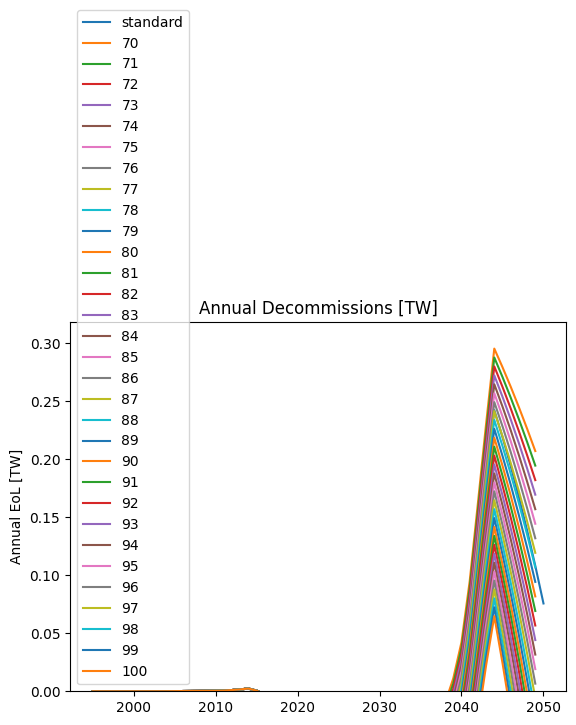

In [17]:
annual_EoL = USyearly.filter(like='DecommisionedCapacity')
plt.plot(annual_EoL/1e6)
plt.legend(r1.scenario.keys())
plt.ylabel('Annual EoL [TW]')
plt.title('Annual Decommissions [TW]')
plt.ylim(0,)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  157,
  15

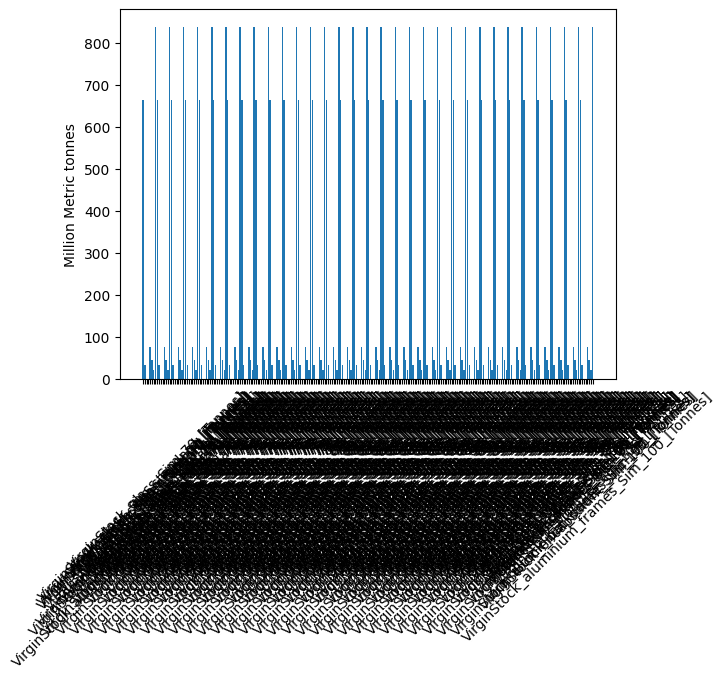

In [18]:
recycledperc_virginstock = UScum.filter(like='VirginStock')#.filter(like='Recycled')
#recycledperc_virginstock.drop('VirginStock_Module_sim1_h_RecycledPERC_[Tonnes]',axis=1, inplace=True)
plt.bar(recycledperc_virginstock.columns, recycledperc_virginstock.loc[2050]/1e6)# tick_label = MATERIALS, color=colormats)
plt.ylabel('Million Metric tonnes')
plt.xticks(rotation=45)

In [19]:
e_annual_sumDemands = energy_demands.filter(like='demand_total')


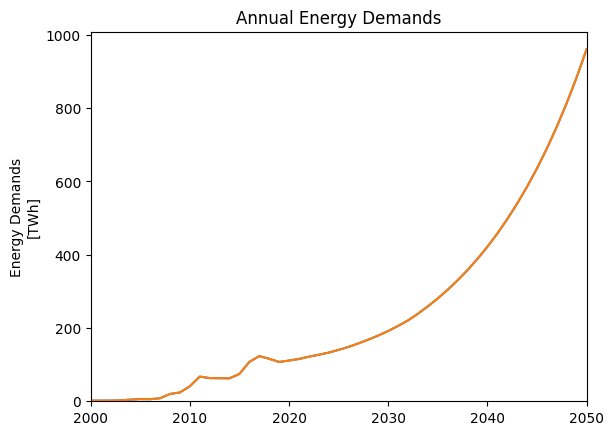

In [20]:
e_annual_sumDemands_TWh = e_annual_sumDemands/1e12

fig, ax1 = plt.subplots()

#world electricity demand
#ax1.plot(world_elec_demand.iloc[0:2022,0], label='Global Electricity Demand', ls='dashdot')

#BAU
ax1.plot(e_annual_sumDemands_TWh.iloc[:,0:2])

#ax1.legend(scennames_labels_flat)
plt.title('Annual Energy Demands')
plt.ylabel('Energy Demands\n[TWh]')
plt.ylim(0,)
plt.xlim(2000,2050)

plt.show()

In [21]:
e_annual_sumDemands_cumu = e_annual_sumDemands.cumsum()

In [22]:
scennames_labels = ['Baseline', 'Extreme']
cumu_e_demands_twh = e_annual_sumDemands_cumu.loc[2050]/1e12
cumu_e_demands_twh

standard_e_demand_total    12325.413131
70_e_demand_total          12325.413131
71_e_demand_total          12325.413131
72_e_demand_total          12325.413131
73_e_demand_total          12325.413131
74_e_demand_total          12325.413131
75_e_demand_total          12325.413131
76_e_demand_total          12325.413131
77_e_demand_total          12325.413131
78_e_demand_total          12325.413131
79_e_demand_total          12325.413131
80_e_demand_total          12325.413131
81_e_demand_total          12325.413131
82_e_demand_total          12325.413131
83_e_demand_total          12325.413131
84_e_demand_total          12325.413131
85_e_demand_total          12325.413131
86_e_demand_total          12325.413131
87_e_demand_total          12325.413131
88_e_demand_total          12325.413131
89_e_demand_total          12325.413131
90_e_demand_total          12325.413131
91_e_demand_total          12325.413131
92_e_demand_total          12325.413131
93_e_demand_total          12325.413131


In [23]:
scenenames_labels_flat = ['baseline']

for f in bifiFactors.keys():
    scenenames_labels_flat.append(f)

In [24]:
energyGen_cumu = energyGen.cumsum()
e_annual_sumDemands_cumu.columns=e_annual_sumDemands_cumu.columns.str.rstrip('_e_demand_total')
energyGen_cumu.columns = energyGen_cumu.columns.str.strip('e_out_annual[Wh]')
e_annual_sumDemands_cumu = e_annual_sumDemands_cumu.rename(columns={'standar':'standard'})

#energyGen_cumu.columns = e_annual_sumDemands_cumu.columns = scennames_labels_flat
netEnergy_cumu = energyGen_cumu.loc[[2049]] - e_annual_sumDemands_cumu.loc[[2049]]


Text(0, 0.5, 'Cumulative Net Energy\n[thousand TWh]')

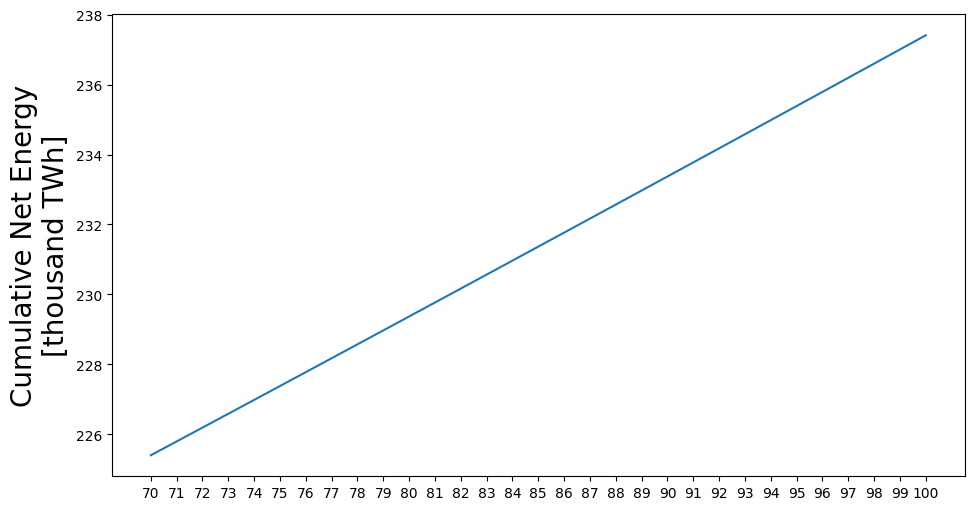

In [26]:
cumu_netEnergy_twh = netEnergy_cumu.loc[2049]/1e15

fig, (ax0) = plt.subplots(1,1,figsize=(11,6), sharey=True, 
                                      gridspec_kw={'wspace': 0, 'width_ratios': [1]})
ax0.plot(cumu_netEnergy_twh[1::])
ax0.set_ylabel('Cumulative Net Energy\n[thousand TWh]', fontsize=20)


In [27]:
print("Cumulative net Energy baseline", cumu_netEnergy_twh[0], " thousan TWh")
print("Change in net Energy for every % improvmeent", (cumu_netEnergy_twh.iloc[3]-cumu_netEnergy_twh.iloc[2])*1000, " Twh")

Cumulative net Energy baseline 228.2897742969357  thousan TWh
Change in net Energy for every % improvmeent 395.61021302552035  Twh


C:\Users\sayala\AppData\Local\Temp\1\ipykernel_8196\3232611658.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Cumulative net Energy baseline", cumu_netEnergy_twh[0], " thousan TWh")


In [28]:
foo = netEnergy_cumu/netEnergy_cumu['70'].loc[2049]
foo = foo.T

In [29]:
plt.rcParams.update({'font.size': 14})
plt.rcParams['figure.figsize'] = (8, 6)

In [30]:
listyears=[]
fooval = []
for ii in range(70, 101):
        listyears.append(ii)
        fooval.append(foo.loc['standard'][2049])

Text(0.5, 0, 'Bifaciality Factor')

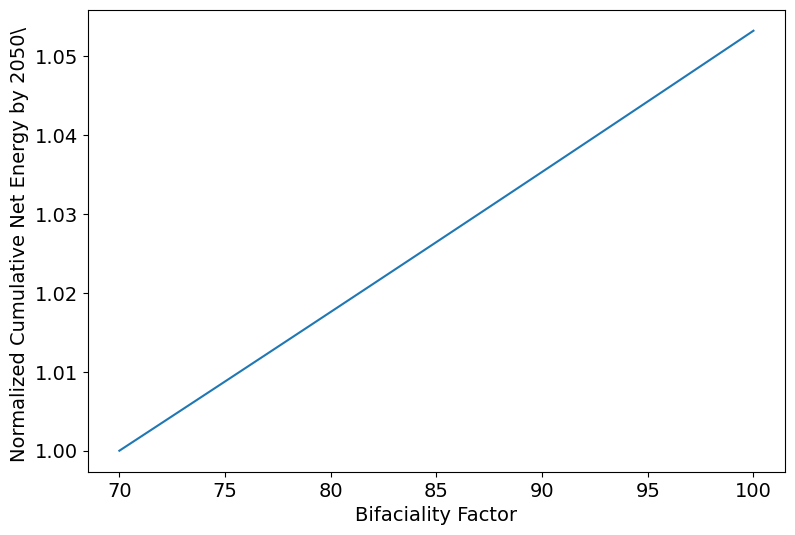

In [31]:
fig, (ax0) = plt.subplots(1,1,figsize=(9,6), sharey=True, 
                                      gridspec_kw={'wspace': 0, 'width_ratios': [1]})
ax0.plot(listyears,foo[1::])
ax0.set_ylabel('Normalized Cumulative Net Energy by 2050\ ', fontsize=14)
#ax0.plot(listyears,fooval)
ax0.set_xlabel('Bifaciality Factor')
#ax0.set_title('Cumulative Net Energy produced by 2050, \nassuming PV installations become bifacial at specific bifaciality factor starting 2024')
